<a href="https://colab.research.google.com/github/Daz-Riza-Seriog/Tensorflow_ML/blob/main/2-Customise%20your%20Models/2-%20Week%202/2-Keras%20Image%20Data%20Augmentation/Keras_image_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files in Drive for use in this Colab notebook.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Install the PyDrive wrapper & import libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
urls = ["11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd"]
output = ["flowers-recognition-split.zip"]

for i in np.arange(len(urls)):
  file_id = urls[i]
  downloaded = drive.CreateFile({'id':file_id})
  downloaded.GetContentFile(output[i])

In [ ]:
!unzip /content/flowers-recognition-split.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers-recognition-split/train/sunflower/10862313945_e8ed9202d9_m.jpg  
  inflating: __MACOSX/flowers-recognition-split/train/sunflower/._10862313945_e8ed9202d9_m.jpg  
  inflating: flowers-recognition-split/train/sunflower/11881770944_22b4f2f8f6_n.jpg  
  inflating: __MACOSX/flowers-recognition-split/train/sunflower/._11881770944_22b4f2f8f6_n.jpg  
  inflating: flowers-recognition-split/train/sunflower/1217254584_4b3028b93d.jpg  
  inflating: __MACOSX/flowers-recognition-split/train/sunflower/._1217254584_4b3028b93d.jpg  
  inflating: flowers-recognition-split/train/sunflower/12282924083_fb80aa17d4_n.jpg  
  inflating: __MACOSX/flowers-recognition-split/train/sunflower/._12282924083_fb80aa17d4_n.jpg  
  inflating: flowers-recognition-split/train/sunflower/1240625276_fb3bd0c7b1.jpg  
  inflating: __MACOSX/flowers-recognition-split/train/sunflower/._1240625276_fb3bd0c7b1.jpg  
  inflating: flowers-recognition-split/train/s

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [ ]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [ ]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [ ]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


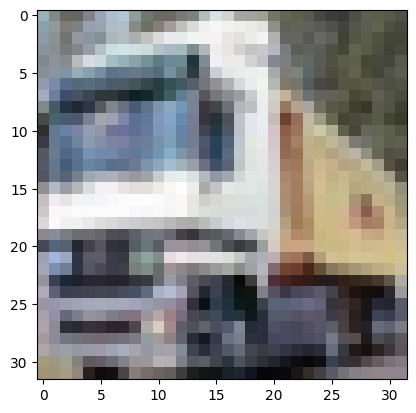

In [ ]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [ ]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmentation generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [ ]:
# Create an ImageDataGenerator object

image_generator =  ImageDataGenerator(preprocessing_function=monochrome,rotation_range=180, rescale = (1/255.0))
image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options.

In [ ]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features, training_labels,batch_size=1,shuffle=False)

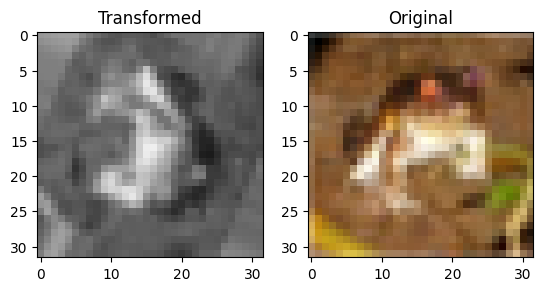

In [ ]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [ ]:
# Inspect the directory structure
# Please use your own path once you have downloaded the dataset and mounted your Drive

train_path = '/content/flowers-recognition-split/train'
val_path = '/content/flowers-recognition-split/val'

In [ ]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path,batch_size=64,classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


In [ ]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path,batch_size=64,classes=classes, target_size=(16,16))

Found 1296 images belonging to 5 classes.


[0. 0. 1. 0. 0.]


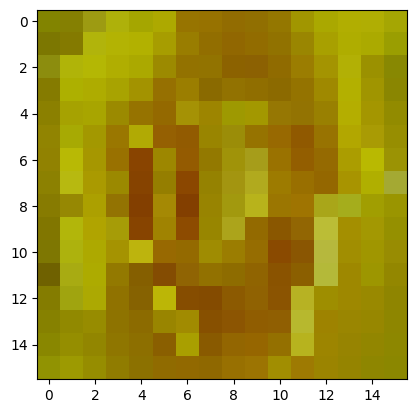

In [ ]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [ ]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(train_path,batch_size=64,classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [ ]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [ ]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 8)         1544      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 8)           4104      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 4)           516       
                                                                 
 flatten (Flatten)           (None, 16)                0

#### Train the model

In [ ]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [ ]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)

<ipython-input-36-2312f0f16984>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)


Epoch 1/5
47/47 [==============================] - 15s 266ms/step - loss: 1.5969 - accuracy: 0.2288
Epoch 2/5
47/47 [==============================] - 12s 253ms/step - loss: 1.5478 - accuracy: 0.2599
Epoch 3/5
47/47 [==============================] - 12s 255ms/step - loss: 1.4732 - accuracy: 0.2879
Epoch 4/5
47/47 [==============================] - 12s 253ms/step - loss: 1.3975 - accuracy: 0.3706
Epoch 5/5
47/47 [==============================] - 12s 254ms/step - loss: 1.3222 - accuracy: 0.4215


#### Evaluate the model

In [ ]:
# Evaluate the model

model.evaluate(val_generator, steps=val_steps)

20/20 [==============================] - 6s 310ms/step - loss: 1.3497 - accuracy: 0.3859


[1.3496555089950562, 0.38593751192092896]

#### Predict using the generator

In [ ]:
# Predict labels with the model

predictions= model.predict(val_generator, steps=1)
print(np.round(predictions, 2))

1/1 [==============================] - 1s 650ms/step
[[0.05 0.01 0.36 0.   0.57]
 [0.22 0.37 0.34 0.01 0.06]
 [0.12 0.1  0.02 0.41 0.36]
 [0.24 0.29 0.1  0.14 0.23]
 [0.15 0.1  0.39 0.03 0.34]
 [0.1  0.05 0.52 0.01 0.32]
 [0.19 0.13 0.19 0.08 0.42]
 [0.15 0.16 0.04 0.36 0.3 ]
 [0.18 0.15 0.1  0.2  0.36]
 [0.18 0.17 0.51 0.01 0.14]
 [0.01 0.   0.73 0.   0.26]
 [0.21 0.34 0.06 0.22 0.17]
 [0.24 0.3  0.08 0.17 0.21]
 [0.24 0.27 0.32 0.02 0.15]
 [0.03 0.01 0.63 0.   0.33]
 [0.2  0.38 0.03 0.22 0.17]
 [0.18 0.13 0.37 0.03 0.29]
 [0.15 0.09 0.27 0.06 0.43]
 [0.21 0.37 0.06 0.2  0.15]
 [0.08 0.03 0.26 0.01 0.62]
 [0.25 0.24 0.09 0.09 0.33]
 [0.11 0.05 0.43 0.02 0.4 ]
 [0.13 0.07 0.45 0.01 0.34]
 [0.19 0.25 0.04 0.29 0.23]
 [0.19 0.14 0.14 0.13 0.41]
 [0.27 0.31 0.18 0.05 0.2 ]
 [0.16 0.11 0.1  0.17 0.45]
 [0.21 0.19 0.3  0.06 0.23]
 [0.09 0.03 0.35 0.01 0.51]
 [0.19 0.14 0.33 0.03 0.3 ]
 [0.21 0.52 0.08 0.11 0.08]
 [0.05 0.02 0.37 0.01 0.55]
 [0.02 0.01 0.58 0.   0.39]
 [0.21 0.3  0.07 0.23 0